<center><h1>Data Exploration </center>

In [24]:
import pandas as pd
import numpy as np
import os
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Set the warning mode to 'none' to suppress the SettingWithCopyWarning
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [5]:
# Setting up the working directory
os.chdir('..')

In [3]:
df = pd.read_csv(r'data/iot_23.csv', low_memory=False)

In [4]:
df.head(5)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,-,3e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,-,2e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,-,2e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,-,2e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,-,2e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan


In [13]:
# Checking the count of the columns
print(df.columns)
print('\n')
print('Total number of columns', len(df.columns))

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label'],
      dtype='object')


Total number of columns 21


In [14]:
# Checking the data types of the dataframe
df.dtypes

ts               float64
uid               object
id.orig_h         object
id.orig_p        float64
id.resp_h         object
id.resp_p        float64
proto             object
service           object
duration          object
orig_bytes        object
resp_bytes        object
conn_state        object
local_orig        object
local_resp        object
missed_bytes     float64
history           object
orig_pkts        float64
orig_ip_bytes    float64
resp_pkts        float64
resp_ip_bytes    float64
label             object
dtype: object

## Dataset Description
1. ts --	The time when the capture was done, expressed in Unix Time
2. uid --	The ID of the capture
3. id_orig_h --	The IP address where the attack happened, either IPv4 or IPv6
4. id_orig_p --	The port used by the responder
5. id_resp_h --	The IP address of the device on which the capture happened
6. id_resp_p --	The port used for the response from the device where the capture happened
7. proto --	The network protocol used for the data package
8. service --	The application protocol
9. duration --	The amount of time data was traded between the device and the attacker
10. orig_bytes --	The amount of data sent to the device
11. resp_bytes --	The amount of data sent by the device
12. conn_state --	The state of the connection
13. local_orig --	Whether the connection originated locally
14. local_resp --	Whether the response originated locally
15. missed_bytes --	Number of missed bytes in a message
16. history --	The history of the state of the connection	
17. orig_pkts --	Number of packets being sent to the device	
18. orig_ip_bytes --	Number of bytes being sent to the device
19. resp_pkts --	Number of packets being sent from the device
20. resp_ip_bytes --	Number of bytes being sent from the device
21. label --	The type of capture, benign or malicious


In [15]:
# Check for different types of attacks and their frequencies in the data
df['label'].value_counts()

PartOfAHorizontalPortScan     3389036
Okiru                         1313012
Benign                         688812
DDoS                           638506
C&C                             15286
C&C-HeartBeat                    1332
Attack                            538
C&C-FileDownload                   46
C&C-Torii                          30
FileDownload                       13
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
Name: label, dtype: int64

<center><h1>Data Cleansing and Preprocessing</center>

In [16]:
# Check if any null data exists in the dataset
df.isna().sum()

ts               0
uid              0
id.orig_h        0
id.orig_p        0
id.resp_h        0
id.resp_p        0
proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
local_orig       0
local_resp       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
label            0
dtype: int64

In [17]:
# Convert Unix timestamp to datetime
df['ts'] = pd.to_datetime(df['ts'], unit='s')

In [18]:
# Remove duplicate rows based on all columns
df.drop_duplicates(inplace=True)

## Outlier Treatment
1. Z-Score Calculation: For every data point, compute its Z-score, which represents how many standard deviations the data point is away from the mean of the dataset.

2. Threshold Determination: Set a threshold (commonly set to a value like 3) to determine how extreme a Z-score has to be for the corresponding data point to be considered an outlier.

3. Outlier Identification: Data points with Z-scores greater than the threshold are identified as outliers. Essentially, points that are too far from the mean, based on the set threshold, are flagged.

4. Outlier Removal: Using the identified outliers from the previous step, these data points are excluded or replaced to cleanse the dataset.

5. Clean Dataset: After removal, the result is a dataset with reduced extremities and variations caused by outliers.

In [20]:
# Define a threshold for considering values as outliers
threshold = 3

# Copy the original DataFrame to a new one to retain all columns
df_no_outliers = df.copy(deep = True)

# Iterate through each numerical column
for column in df.select_dtypes(include=np.number):
    # Calculate the z-scores for the column
    z_scores = np.abs(stats.zscore(df_no_outliers[column]))
    
    # Identify outliers
    outliers = np.where(z_scores > threshold)
    
    # Create a mask to filter out outliers
    mask = ~(z_scores > threshold)
    
    # Replace outlier values with NaN
    df_no_outliers[column][~mask] = np.nan

# Optionally, you can drop rows with any missing values after outlier treatment
df_no_outliers.dropna(inplace=True)

In [21]:
df_no_outliers

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,2018-09-06 09:43:43.384673024,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,-,3e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
1,2018-09-06 09:43:43.384677888,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,-,2e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
2,2018-09-06 09:43:43.384681984,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,-,2e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
3,2018-09-06 09:43:43.384694016,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,-,2e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
4,2018-09-06 09:43:43.384698112,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,-,2e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6046618,2019-07-03 14:39:12.145404928,CbiAr234EfpzQInxbg,0.0.0.0,68.0,255.255.255.255,67.0,udp,dhcp,90.034713,3300.0,...,S0,-,-,0.0,D,11.0,3608.0,0.0,0.0,Benign
6046619,2019-07-03 14:39:12.076456192,CqEhZf1lYmVokqECn3,::,143.0,ff02::16,0.0,icmp,-,90.39997,340.0,...,OTH,-,-,0.0,-,9.0,844.0,0.0,0.0,Benign
6046620,2019-07-03 14:39:12.588412928,Cr5vKO1CGfMQwFp22c,::,135.0,ff02::1:ffd5:cdf,136.0,icmp,-,89.82403000000001,72.0,...,OTH,-,-,0.0,-,3.0,216.0,0.0,0.0,Benign
6046621,2019-07-03 14:39:13.612461056,CQ5cJ21U9NUbUWIznd,fe80::5bcc:698e:39d5:cdf,143.0,ff02::16,0.0,icmp,-,45.215915,200.0,...,OTH,-,-,0.0,-,8.0,648.0,0.0,0.0,Benign


In [22]:
# Creating a deep copy of the dataframe
df = df_no_outliers.copy(deep = True)

In [23]:
# Saving the cleaned dataframe
df.to_csv('data/iot_23_cleaned.csv',index = False)

<center><h1>Exploratory Data Analysis </center>

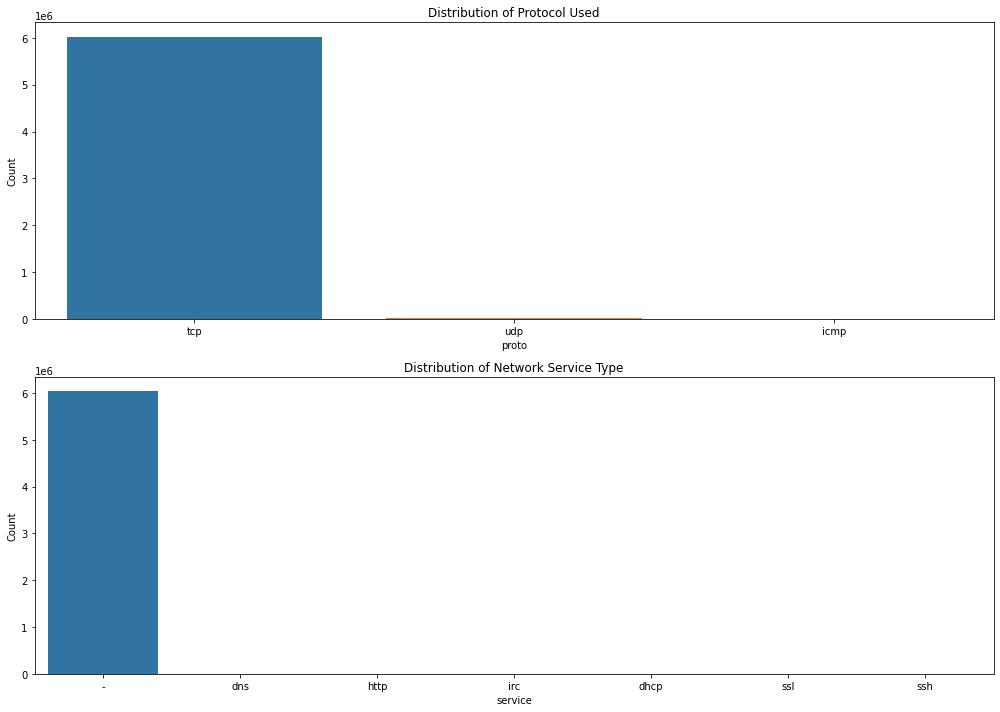

In [24]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))

# Distribution of proto (Protocol used)
sns.countplot(data=df, x='proto', ax=ax[0])
ax[0].set_title('Distribution of Protocol Used')
ax[0].set_ylabel('Count')

# Distribution of service (Network service type)
sns.countplot(data=df, x='service', ax=ax[1])
ax[1].set_title('Distribution of Network Service Type')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

<b>Insights:
1. **Distribution of Protocol Used**: The majority of the connections in the sample use the tcp protocol, followed by udp. There are very few connections that utilize other protocols.
2. **Distribution of Network Service Type**: Most connections do not have a specified service type (-). Among those that are specified, http is the most prevalent.

In [25]:
# Filter out non-numeric values (like '-')
iot_23_filtered = df[df['duration'] != '-']
iot_23_filtered['duration'] = iot_23_filtered['duration'].astype(float)

# Distribution of connection duration
fig_duration = px.histogram(iot_23_filtered, x="duration", nbins=100, title="Distribution of Connection Duration")

# Filter out non-numeric values for orig_bytes
iot_23_filtered_bytes = df[df['orig_bytes'] != '-']
iot_23_filtered_bytes['orig_bytes'] = iot_23_filtered_bytes['orig_bytes'].astype(float).astype(int)


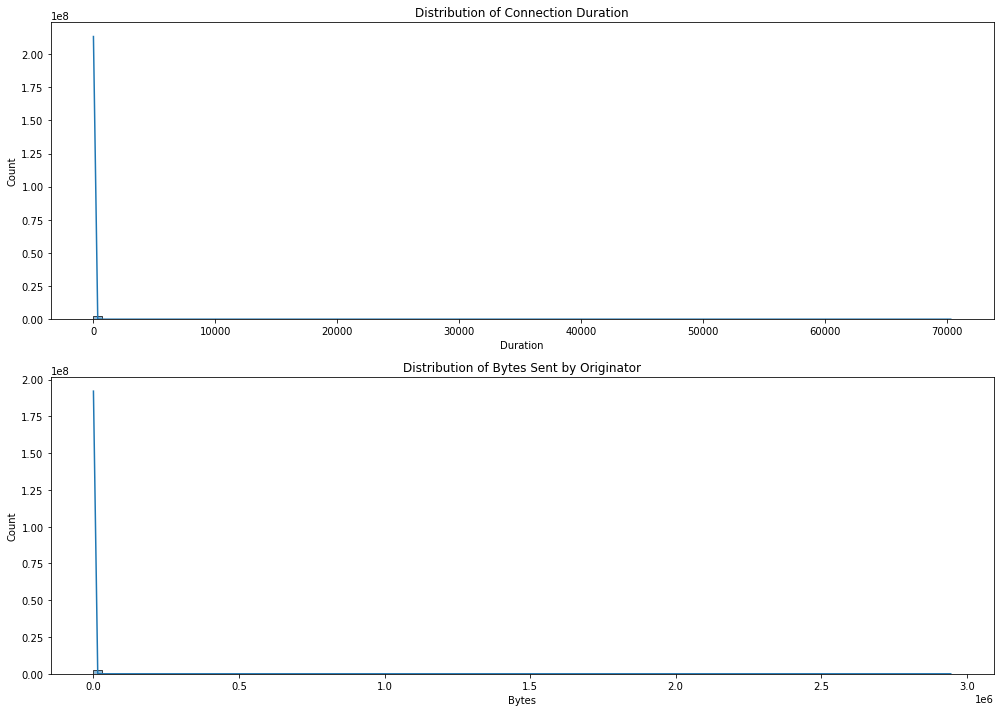

In [26]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))

# Distribution of connection duration
sns.histplot(iot_23_filtered['duration'], bins=100, ax=ax[0], kde=True)
ax[0].set_title('Distribution of Connection Duration')
ax[0].set_xlabel('Duration')
ax[0].set_ylabel('Count')

# Distribution of orig_bytes
sns.histplot(iot_23_filtered_bytes['orig_bytes'], bins=100, ax=ax[1], kde=True)
ax[1].set_title('Distribution of Bytes Sent by Originator')
ax[1].set_xlabel('Bytes')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

<b>Insights:</b>
1. **Distribution of Connection Duration**: Most of the connections have a short duration, with a peak near the start. This could indicate a lot of short-lived connections, possibly signifying network scans or brief exchanges.
2. **Distribution of Bytes Sent by Originator**: The vast majority of connections involve the transmission of a small number of bytes. However, there are a few connections with significantly larger byte transmissions, potentially indicating data exfiltration or large file transfers.

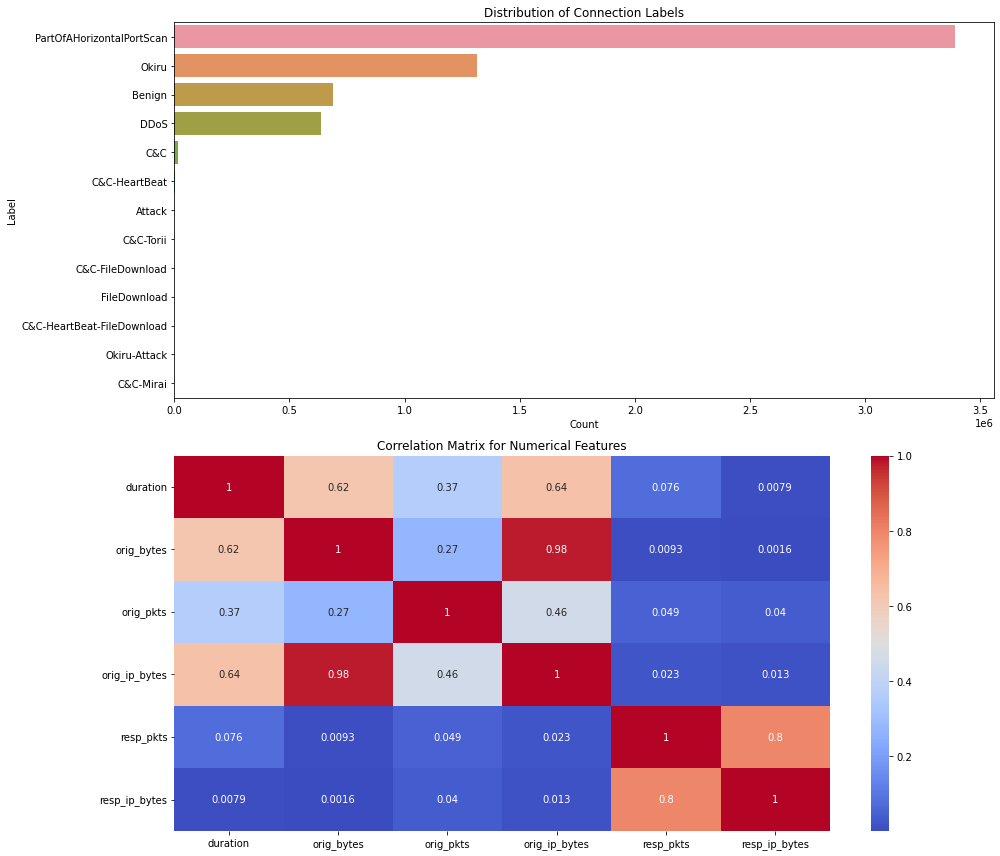

In [27]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Distribution of label
sns.countplot(data=df, y='label', ax=ax[0], order=df['label'].value_counts().index)
ax[0].set_title('Distribution of Connection Labels')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Label')

# Correlation matrix for numerical features
# Filter out non-numeric values for duration and orig_bytes
correlation_data = iot_23_filtered_bytes[['duration', 'orig_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']]
correlation_data['duration'] = correlation_data['duration'].astype(float)
correlation_data['orig_bytes'] = correlation_data['orig_bytes'].astype(int)
correlation_matrix = correlation_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Correlation Matrix for Numerical Features')

plt.tight_layout()
plt.show()


<b>Insights:</b>
1. **Distribution of Connection Labels**: The data predominantly contains benign connections, but there are several labeled as PartOfAHorizontalPortScan, suggesting instances of scanning activity. There are also a few other labels present in smaller quantities.


2. **Correlation Matrix for Numerical Features**:
    There's a high correlation between orig_pkts (original packets) and orig_ip_bytes (original IP bytes). This makes sense as more packets usually mean more bytes.

    resp_pkts (response packets) and resp_ip_bytes (response IP bytes) also exhibit a high correlation for similar reasons.
    There's a mild correlation between orig_bytes and orig_pkts, indicating that as the byte count increases, the number of packets usually increases.

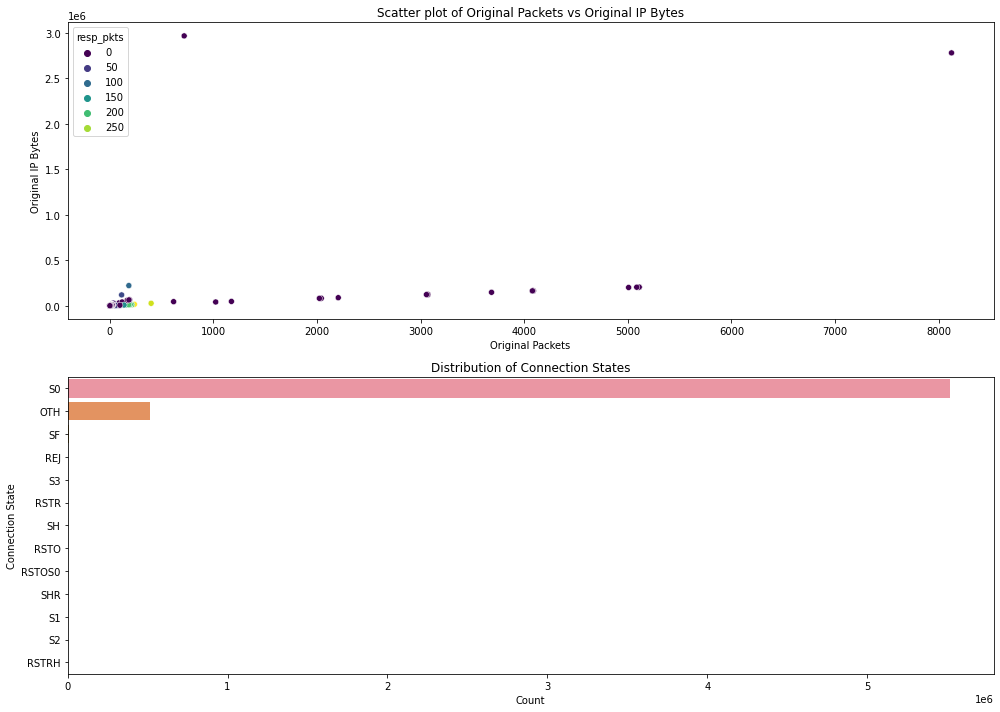

In [28]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))

# Scatter plot of orig_pkts vs orig_ip_bytes
sns.scatterplot(data=correlation_data, x='orig_pkts', y='orig_ip_bytes', hue='resp_pkts', palette='viridis', ax=ax[0])
ax[0].set_title('Scatter plot of Original Packets vs Original IP Bytes')
ax[0].set_xlabel('Original Packets')
ax[0].set_ylabel('Original IP Bytes')

# Distribution of conn_state
sns.countplot(data=df, y='conn_state', ax=ax[1], order=df['conn_state'].value_counts().index)
ax[1].set_title('Distribution of Connection States')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Connection State')

plt.tight_layout()
plt.show()

<b>Insights:</b>

1. **Scatter plot of Original Packets vs Original IP Bytes**: As expected from the correlation matrix, there's a clear trend that as the number of original packets increases, the original IP bytes also increase. The color intensity (representing resp_pkts) adds another dimension, showing that as both original packets and bytes increase, the response packets generally increase.

2. **Distribution of Connection States**: The most frequent connection state is S0, followed by OTH. The S0 state indicates connection attempts where the server never replied to the initial SYN packet from the client. This could be indicative of potential scanning activity.

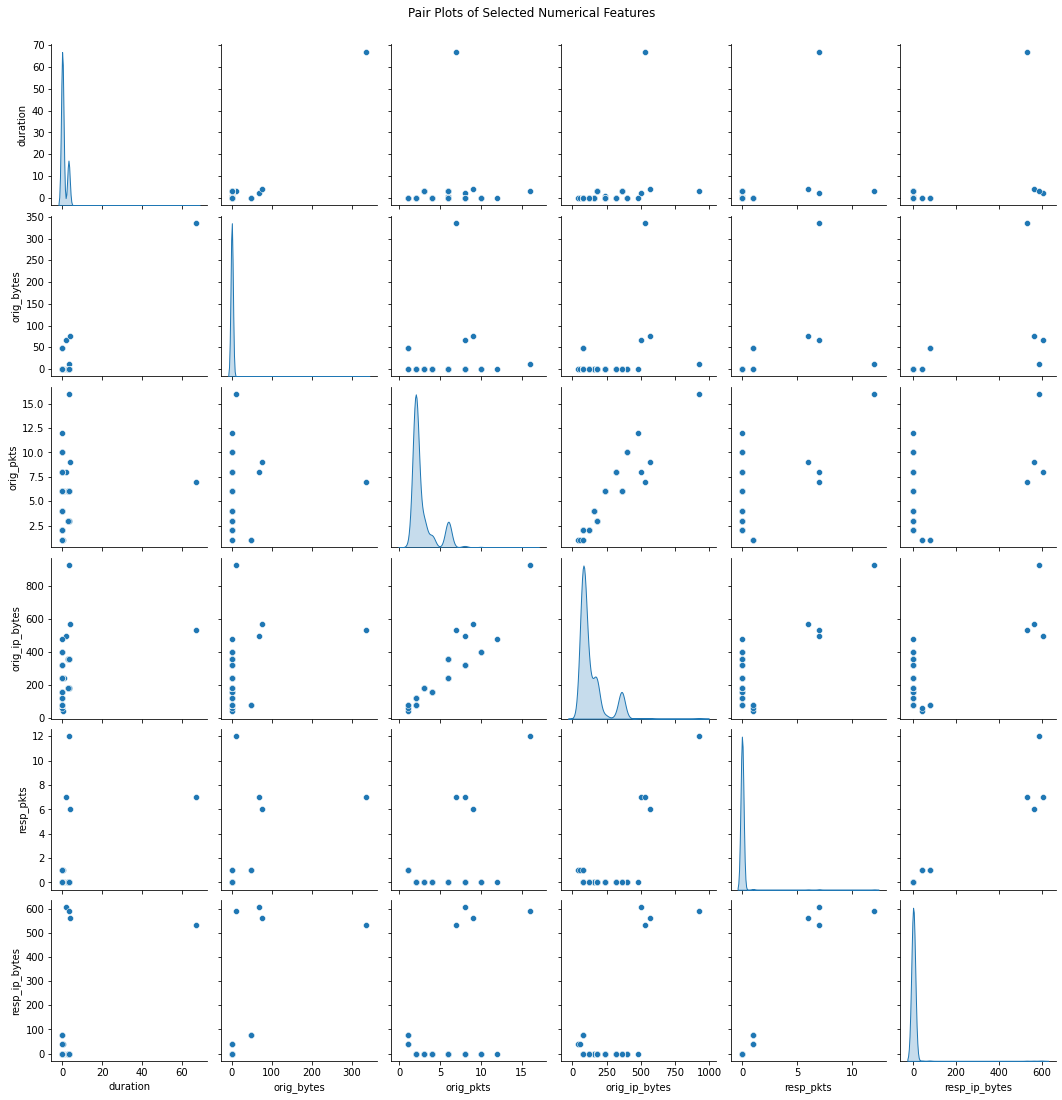

In [29]:
# Sample a subset of the data for visualization
sample_data = correlation_data.sample(n=min(1000, len(correlation_data)), random_state=42)

# Pair plot for selected numerical features
pairplot = sns.pairplot(sample_data, diag_kind='kde')
pairplot.fig.suptitle('Pair Plots of Selected Numerical Features', y=1.02)
plt.show()

<b>Insights<b>:
1. **Pair Plots of Selected Numerical Features**:
    The diagonal KDE plots confirm our earlier observations regarding the distribution of features.
    
    Scatter plots between orig_pkts vs orig_ip_bytes, and resp_pkts vs resp_ip_bytes show a linear relationship, affirming the correlation we identified earlier.
    
    The other scatter plots provide an opportunity to identify potential patterns or clusters. For instance, there seems to be a cluster at the lower end of orig_bytes vs orig_ip_bytes, indicating a set of connections with small byte counts but varying IP bytes.

<center><h1>Feature Selection and Processing </center>

In [34]:
df.label.value_counts()

PartOfAHorizontalPortScan    3389036
Okiru                        1313015
Benign                        688774
DDoS                          638484
C&C                            17213
Name: label, dtype: int64

In [31]:
value = 'C&C'

replace_values = {'C&C-HeartBeat':value,
                 'C&C-Torii': value,
                 'C&C-Mirai' : value,
                 'C&C-FileDownload':value,
                 'C&C-HeartBeat-FileDownload':value,
                 'Attack':value,
                 'FileDownload':value,
                 'Okiru-Attack':'Okiru',
                 }

df['label'] = df['label'].map(lambda x: replace_values.get(x, x))      

In [32]:
df.label.value_counts()

PartOfAHorizontalPortScan    3389036
Okiru                        1313015
Benign                        688774
DDoS                          638484
C&C                            17213
Name: label, dtype: int64

In [33]:
# The nulls are represented by - in the dataset. Replacing them with nan values
df.replace(to_replace = '-', value = np.nan, inplace = True)

In [36]:
# Converting the duration column to float datatype
df['duration'] = df['duration'].apply(float)

In [41]:
# Filtering all the rows where the duration of the connection is greater than 0 seconds
df = df[df['duration']>0].copy(deep = True)

In [42]:
df.isna().sum()

ts                     0
uid                    0
id.orig_h              0
id.orig_p              0
id.resp_h              0
id.resp_p              0
proto                  0
service          2265145
duration               0
orig_bytes             0
resp_bytes             0
conn_state             0
local_orig       2272594
local_resp       2272594
missed_bytes           0
history              843
orig_pkts              0
orig_ip_bytes          0
resp_pkts              0
resp_ip_bytes          0
label                  0
dtype: int64

In [43]:
# Dropping the columns where the missing values accounts to more than 70% of the data
# From the above, service, local_orig and local_resp column has almost all missing values
df.drop(['service','local_orig','local_resp'], axis =1, inplace = True)

In [44]:
# Checking the missing value spread across the categories
df[df.history.isna()].groupby(['label']).size()

label
Benign    843
dtype: int64

In [45]:
# As the missing values are < 1% of the Benign category. We can drop all the null rows acorss the Benign category
df = df[df['history'].notna()].copy(deep = True)

In [46]:
df['label'].value_counts()

PartOfAHorizontalPortScan    1747949
Benign                        265014
Okiru                         125738
DDoS                          124955
C&C                             8095
Name: label, dtype: int64

In [47]:
# The columns duration, orig_bytes and resp_bytes have missing values across same observations
# Determining the missing value spread across the categories
# Checking the missing value spread across the categories
df[(df.orig_bytes.isna()) | (df.resp_bytes.isna()) | (df.duration.isna())].groupby(['label']).size()

Series([], dtype: int64)

In [32]:
# # Dropping the  duration, orig_bytes and resp_bytes columns as they account to more than 90% of the data across some categories
# df.drop(['resp_bytes','orig_bytes','duration'], axis = 1, inplace = True)

In [56]:
# Considering a stratified sample for  modelling
random_state = 36
# Portscan attack sample
df_port = df[df['label']=='PartOfAHorizontalPortScan'].sample(frac = 0.12, random_state = random_state)

# Considering complete Okiru attack category
df_okiru = df[df['label']=='Okiru']

# Considering complete Benign category
df_benign = df[df['label']=='Benign']

# Considering complete DDos category
df_ddos = df[df['label']=='DDoS'].sample(frac = 0.32, random_state = random_state)

# Considering complete C&C category due to low sample size
df_cc = df[df['label']=='C&C']

In [58]:
df_sample = pd.concat([df_port,df_okiru,df_benign,df_ddos,df_cc], axis =0, ignore_index=True)

In [59]:
df_sample['label'].value_counts()

Benign                       265014
PartOfAHorizontalPortScan    209754
Okiru                        125738
DDoS                          39986
C&C                            8095
Name: label, dtype: int64

In [60]:
# Saving the sampled dataframe
df_sample.to_csv('data/iot_23_sample.csv', index = False)

In [6]:
df_sample = pd.read_csv(r'data/iot_23_sample.csv')

In [7]:
df = df_sample.copy(deep = True)

In [8]:
df.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state',
       'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'label'],
      dtype='object')

In [9]:
len(df['id.orig_p'].unique())

17008

In [10]:
# Dropping all un-necessary columns
df.drop(['ts','uid','id.orig_h','id.resp_h','id.orig_p','id.resp_p' ], axis = 1, inplace =True)

In [11]:
# Encoding all the categorical columns
df['proto'].unique()

array(['tcp', 'udp'], dtype=object)

In [12]:
# Type convertions

# Replacing tcp with category 0 and udp with category 1
df['proto'] = df['proto'].replace('tcp',0).replace('udp',1)

# Converting the orig_bytes column to float datatype
df['orig_bytes'] = df['orig_bytes'].apply(float)

# Converting the orig_bytes column to float datatype
df['resp_bytes'] = df['resp_bytes'].apply(float)

In [13]:
df.dtypes

proto              int64
duration         float64
orig_bytes       float64
resp_bytes       float64
conn_state        object
missed_bytes     float64
history           object
orig_pkts        float64
orig_ip_bytes    float64
resp_pkts        float64
resp_ip_bytes    float64
label             object
dtype: object

In [14]:
# Creating a backup dataframe which consists of history and connection state information
df_conn = df.copy(deep = True)

In [15]:
# Temporarily dropping the history and conn information for moedlling and experimentation
df.drop(['conn_state', 'history', 'missed_bytes' ], axis = 1, inplace =True)

In [16]:
# Encoding the labels
le = LabelEncoder()
encoded_labels = le.fit_transform(df['label'])
df['label'] = encoded_labels

In [17]:
X = df.loc[:, df.columns != 'label']
y = df['label']

In [18]:
# Performing train test split for the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
# Creating a eval dataset
X_test, X_eval, y_test, y_eval = train_test_split(X_test, y_test, test_size=0.25, random_state=41)

<h1><center> Modelling and Experimentation </h1></center>

In [20]:
# Decision tree Classifier
treeclassifier = DecisionTreeClassifier()

In [21]:
treeclassifier.fit(X_train, y_train)
y_pred = treeclassifier.predict(X_test)
score = treeclassifier.score(X_test,y_test)
print(score)

0.7818518213962667


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     49760
           1       0.93      0.34      0.50      1486
           2       0.44      0.00      0.00      7658
           3       0.50      0.77      0.60     23380
           4       0.79      0.68      0.73     39326

    accuracy                           0.78    121610
   macro avg       0.73      0.56      0.57    121610
weighted avg       0.79      0.78      0.76    121610



In [115]:
# XGBoost Classifier
learning_rate_range = np.arange(0.01, 1, 0.05)
test_XG = [] 
train_XG = []
for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(eta = lr)
    xgb_classifier.fit(X_train, y_train)
    train_XG.append(xgb_classifier.score(X_train, y_train))
    test_XG.append(xgb_classifier.score(X_test, y_test))

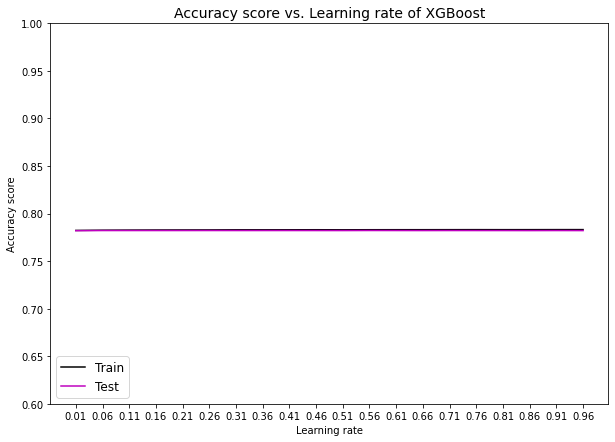

In [116]:
fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='black', label='Train')
plt.plot(learning_rate_range, test_XG, c='m', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.6, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()

In [ ]:
# SVM classifier
SVM_classifier = SVC(C=1.0, cache_size=1500, verbose=True)
SVM_classifier.fit(X_train, y_train)

# Evaluate the model on the testing data
score = SVM_classifier.score(X_test, y_test)
print('Model Accuracy: ', score)

# Predict the labels of the test set
y_pred = SVM_classifier.predict(X_test)

# Calculate the classification report of the model
report = classification_report(y_test, y_pred, zero_division=0)
print('Classification Report:')
print(report)

[LibSVM]

In [26]:
# Naive Bayse Classifier
clf = GaussianNB()

clf.fit(X_train, y_train)
print('Model Accuracy',clf.score(X_test, y_test))


y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy 0.34062988241098596
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.06      0.11     49760
           1       0.62      0.24      0.35      1486
           2       0.00      0.00      0.00      7658
           3       0.42      0.99      0.59     23380
           4       0.24      0.38      0.29     39326

    accuracy                           0.34    121610
   macro avg       0.44      0.33      0.27    121610
weighted avg       0.54      0.34      0.26    121610



In [27]:
# Random forest classifier
classifier_rf = RandomForestClassifier(random_state=90, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)
print(classifier_rf.score(X_test, y_test))


y_pred = classifier_rf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

0.7799276375298084
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     49760
           1       0.98      0.33      0.49      1486
           2       0.00      0.00      0.00      7658
           3       0.50      0.74      0.59     23380
           4       0.77      0.70      0.73     39326

    accuracy                           0.78    121610
   macro avg       0.65      0.55      0.56    121610
weighted avg       0.76      0.78      0.76    121610



C:\Users\aksha\anaconda3\envs\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aksha\anaconda3\envs\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aksha\anaconda3\envs\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))


y_pred = knn.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

0.7670586300468711
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     49760
           1       0.80      0.35      0.48      1486
           2       0.28      0.00      0.00      7658
           3       0.47      0.84      0.60     23380
           4       0.83      0.60      0.69     39326

    accuracy                           0.77    121610
   macro avg       0.67      0.56      0.55    121610
weighted avg       0.79      0.77      0.75    121610



In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Scale the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the target variable to categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# Configure the architecture of the CNN model
model = Sequential()
model.add(Dense(2000, activation='relu', input_dim=len(features)))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(le.classes_), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
start = time.time()
print('Program start...')
print()

history = model.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data=(X_test, Y_test), verbose=1)
print()

end = time.time()
print('Program end...')
print()
print('Time cost: ')
print(end - start, 'seconds')

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy:', test_accuracy)